#Problem Statement
The city of Tetouan, Morocco, faces challenges in managing and optimizing its energy consumption due to increasing demand and limited local energy production. With a rapidly growing population and reliance on imported hydrocarbons, understanding the factors influencing energy consumption is critical. This project aims to analyze the energy consumption data of Tetouan to identify trends, correlations, and potential areas for efficiency improvements.

Objectives

1.⁠ ⁠Data Analysis: Explore and analyze the energy consumption dataset to identify patterns and trends over time.

2.⁠ ⁠Impact Assessment: Assess the impact of environmental factors (temperature, humidity, wind speed) on energy consumption across different zones.

3.⁠ ⁠Predictive Modeling: Develop predictive models to forecast energy consumption based on historical data and environmental variables.

4.⁠ ⁠Recommendations: Generate actionable insights and recommendations for optimizing energy distribution and consumption in Tetouan.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/powerconsumption.csv')

#Data Exploration and Understanding

In [ ]:
data.shape

(52416, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
# checking for missing values
data.isnull().sum()

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


In [ ]:
data.duplicated().sum()

0

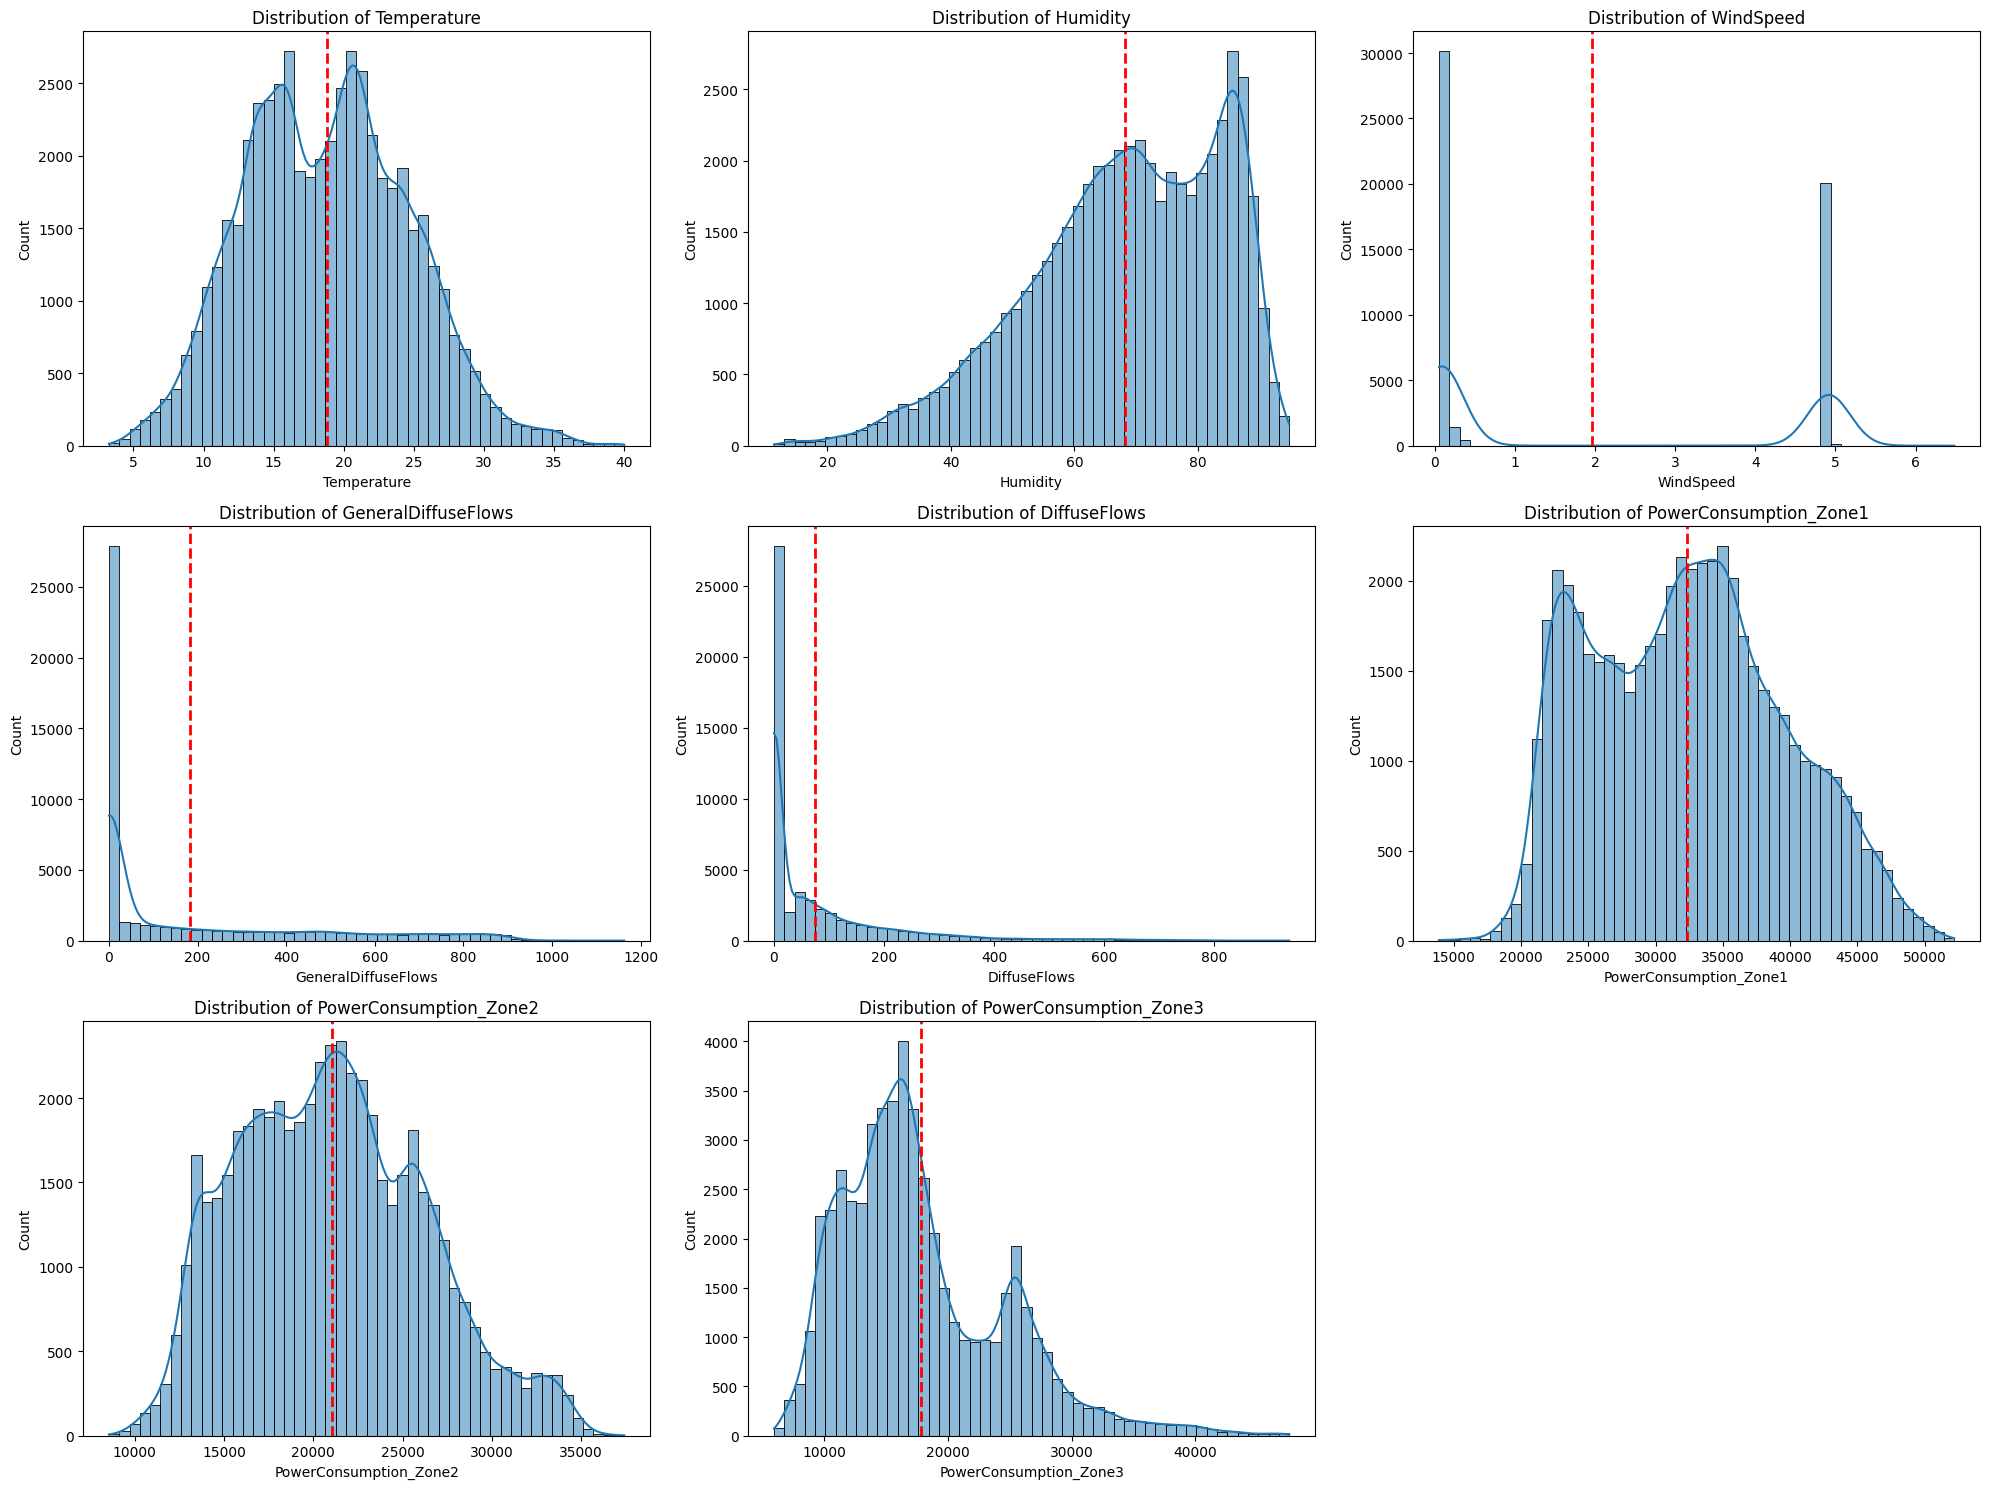

In [ ]:
plt.figure(figsize=(20,15))

numeric_vars = ['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[var], kde=True, bins=50)
    plt.axvline(data[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

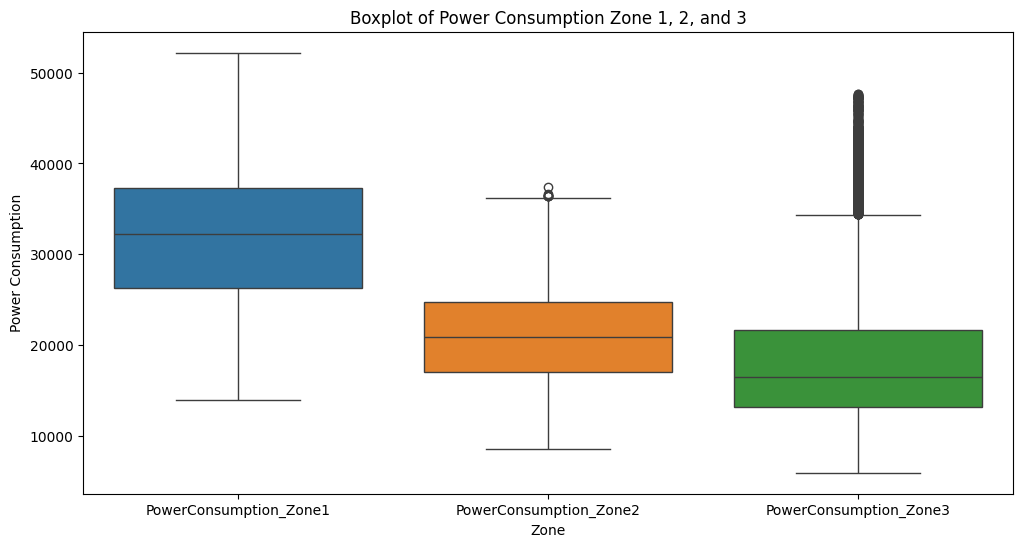

In [ ]:
# Visualize the outlier on consumption zones
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']])
plt.title('Boxplot of Power Consumption Zone 1, 2, and 3')
plt.xlabel('Zone')
plt.ylabel('Power Consumption')
plt.show()

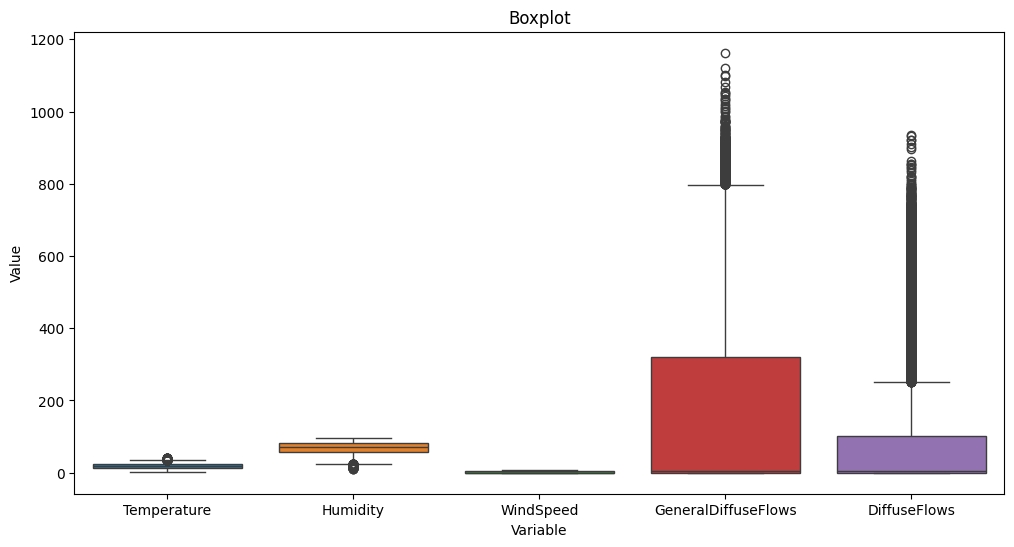

In [ ]:
# check outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Temperature', 'Humidity', 'WindSpeed','GeneralDiffuseFlows','DiffuseFlows']])
plt.title('Boxplot')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In [ ]:
from scipy import stats
cols = data[['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

for col in cols:
    z = np.abs(stats.zscore(data[col],nan_policy='omit'))
    outliers = data[col][z > 3]
    # Calculate the percentage of outliers and then print it
    percentage_outliers = (len(outliers) * 100) / len(data)
    print(f'{col} has {len(outliers)} outliers ({percentage_outliers:.2f}%)')

Temperature has 89 outliers (0.17%)
Humidity has 209 outliers (0.40%)
WindSpeed has 0 outliers (0.00%)
GeneralDiffuseFlows has 23 outliers (0.04%)
DiffuseFlows has 1361 outliers (2.60%)
PowerConsumption_Zone1 has 0 outliers (0.00%)
PowerConsumption_Zone2 has 1 outliers (0.00%)
PowerConsumption_Zone3 has 656 outliers (1.25%)


In [ ]:
# Convert 'Datetime' column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%m/%d/%Y %H:%M')

In [ ]:
# Create new time-based features
data['Minute'] = data['Datetime'].dt.minute
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['DayOfWeek'] =data['Datetime'].dt.dayofweek
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year

In [ ]:
data['PowerConsumption_Zone'] = data[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis=1)


In [ ]:
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Minute,Hour,Day,DayOfWeek,Month,Year,PowerConsumption_Zone
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,1,6,1,2017,23475.178480
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10,0,1,6,1,2017,23106.947957
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,20,0,1,6,1,2017,22601.073977
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,30,0,1,6,1,2017,21829.744030
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,40,0,1,6,1,2017,21216.815423


In [ ]:
data.describe()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Minute,Hour,Day,DayOfWeek,Month,Year,PowerConsumption_Zone
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.0,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,25.000000,11.500000,15.678571,3.000000,6.510989,2017.0,23740.961955
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,0.000000,0.000000,1.000000,0.000000,1.000000,2017.0,12261.679913
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,10.000000,5.750000,8.000000,1.000000,4.000000,2017.0,18833.024880
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,25.000000,11.500000,16.000000,3.000000,7.000000,2017.0,23262.930313
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,40.000000,17.250000,23.000000,5.000000,9.250000,2017.0,27916.390770
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,50.000000,23.000000,31.000000,6.000000,12.000000,2017.0,44736.048650
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,17.078414,6.922253,8.771822,2.000019,3.440642,0.0,5714.379655


In [ ]:
data.corr()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Minute,Hour,Day,DayOfWeek,Month,Year,PowerConsumption_Zone
Datetime,1.000000,0.283018,-0.021818,0.180348,-0.018527,-0.131816,-0.001910,0.325206,-0.233929,1.128678e-04,2.744867e-03,8.760997e-02,4.758381e-03,9.965010e-01,NaN,0.007514
Temperature,0.283018,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527,-6.724601e-05,1.971305e-01,1.926774e-02,-1.370995e-02,2.843350e-01,NaN,0.488238
Humidity,-0.021818,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022,4.929864e-04,-2.426916e-01,-4.540307e-02,-1.711388e-02,-1.741931e-02,NaN,-0.299059
WindSpeed,0.180348,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641,-3.136897e-04,4.148645e-03,1.640667e-01,3.211641e-02,1.683554e-01,NaN,0.221706
GeneralDiffuseFlows,-0.018527,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376,-1.913001e-04,1.299766e-01,3.225334e-02,9.666328e-03,-2.055450e-02,NaN,0.150368
DiffuseFlows,-0.131816,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506,-1.828407e-03,1.309090e-01,-2.827775e-02,-2.453960e-02,-1.297793e-01,NaN,0.032068
PowerConsumption_Zone1,-0.001910,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733,3.426961e-04,7.279525e-01,2.627309e-02,-6.970813e-02,-5.346049e-03,NaN,0.959146
PowerConsumption_Zone2,0.325206,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932,3.307693e-05,6.633590e-01,5.294130e-02,-1.226819e-01,3.202665e-01,NaN,0.871069
PowerConsumption_Zone3,-0.233929,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000,3.886920e-05,4.542566e-01,-4.782920e-03,5.294106e-03,-2.339260e-01,NaN,0.871777
Minute,0.000113,-0.000067,0.000493,-0.000314,-0.000191,-0.001828,0.000343,0.000033,0.000039,1.000000e+00,1.842933e-17,5.190033e-16,2.017312e-17,7.656029e-15,NaN,0.000168


In [ ]:
#Value count of variables in the dataset
for col in data.columns:
  print(f'{col}: {data[col].value_counts()}\n')

Datetime: Datetime
2017-01-01 00:00:00    1
2017-08-31 16:40:00    1
2017-08-31 15:00:00    1
2017-08-31 15:10:00    1
2017-08-31 15:20:00    1
                      ..
2017-05-02 08:20:00    1
2017-05-02 08:30:00    1
2017-05-02 08:40:00    1
2017-05-02 08:50:00    1
2017-12-30 23:50:00    1
Name: count, Length: 52416, dtype: int64

Temperature: Temperature
15.18    58
20.76    56
19.79    55
20.74    52
20.83    51
         ..
33.49     1
33.35     1
33.22     1
30.68     1
6.58      1
Name: count, Length: 3437, dtype: int64

Humidity: Humidity
85.90    197
84.60    190
85.00    189
86.60    187
86.30    186
        ... 
31.41      1
17.92      1
18.42      1
20.15      1
45.89      1
Name: count, Length: 4443, dtype: int64

WindSpeed: WindSpeed
0.082    2291
0.083    1979
0.084    1831
0.081    1804
0.085    1513
         ... 
2.466       1
3.701       1
4.218       1
2.121       1
3.006       1
Name: count, Length: 548, dtype: int64

GeneralDiffuseFlows: GeneralDiffuseFlows
0.055  

#⁠Exploratory Data Analysis (EDA)

In [ ]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Minute', 'Hour',
       'Day', 'DayOfWeek', 'Month', 'Year', 'PowerConsumption_Zone'],
      dtype='object')

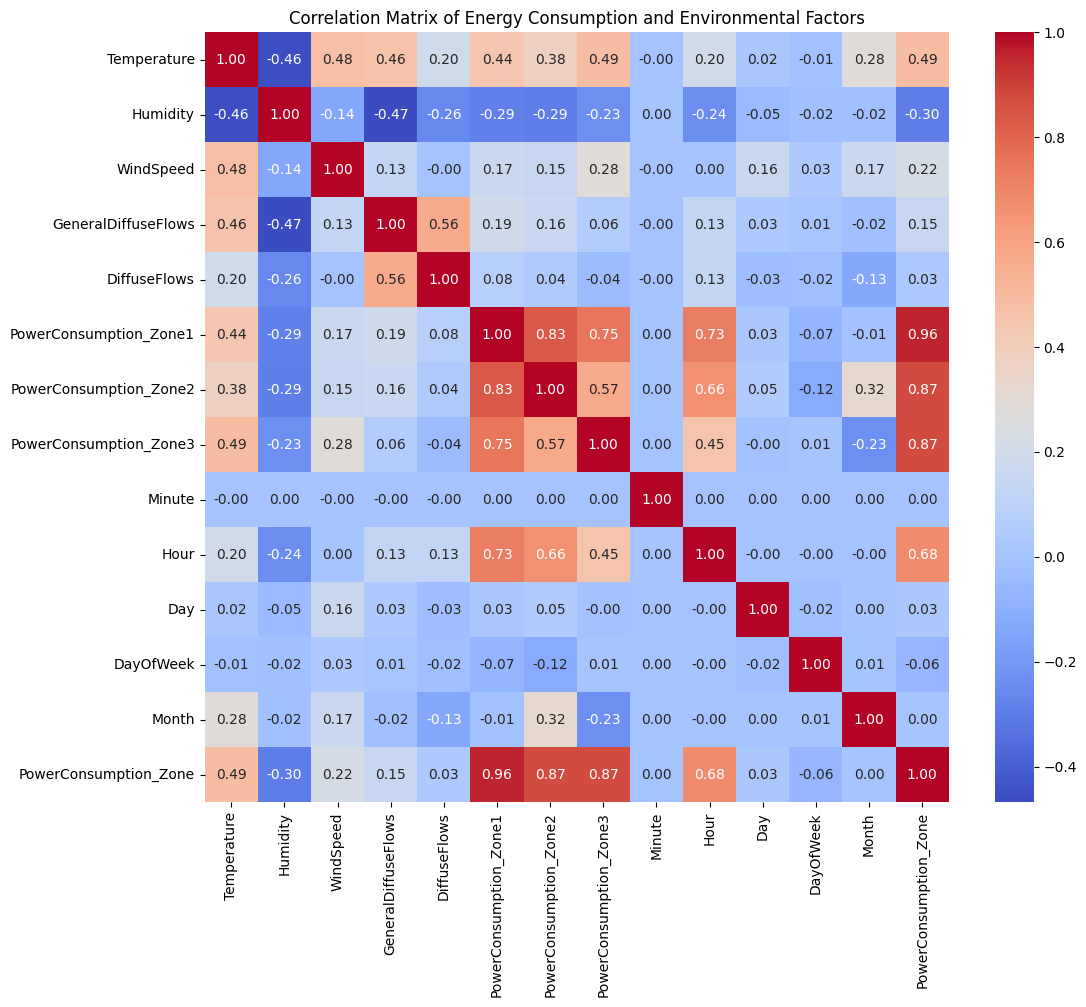

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3','Minute','Hour',	'Day',	'DayOfWeek',	'Month','PowerConsumption_Zone']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Energy Consumption and Environmental Factors')
plt.show()

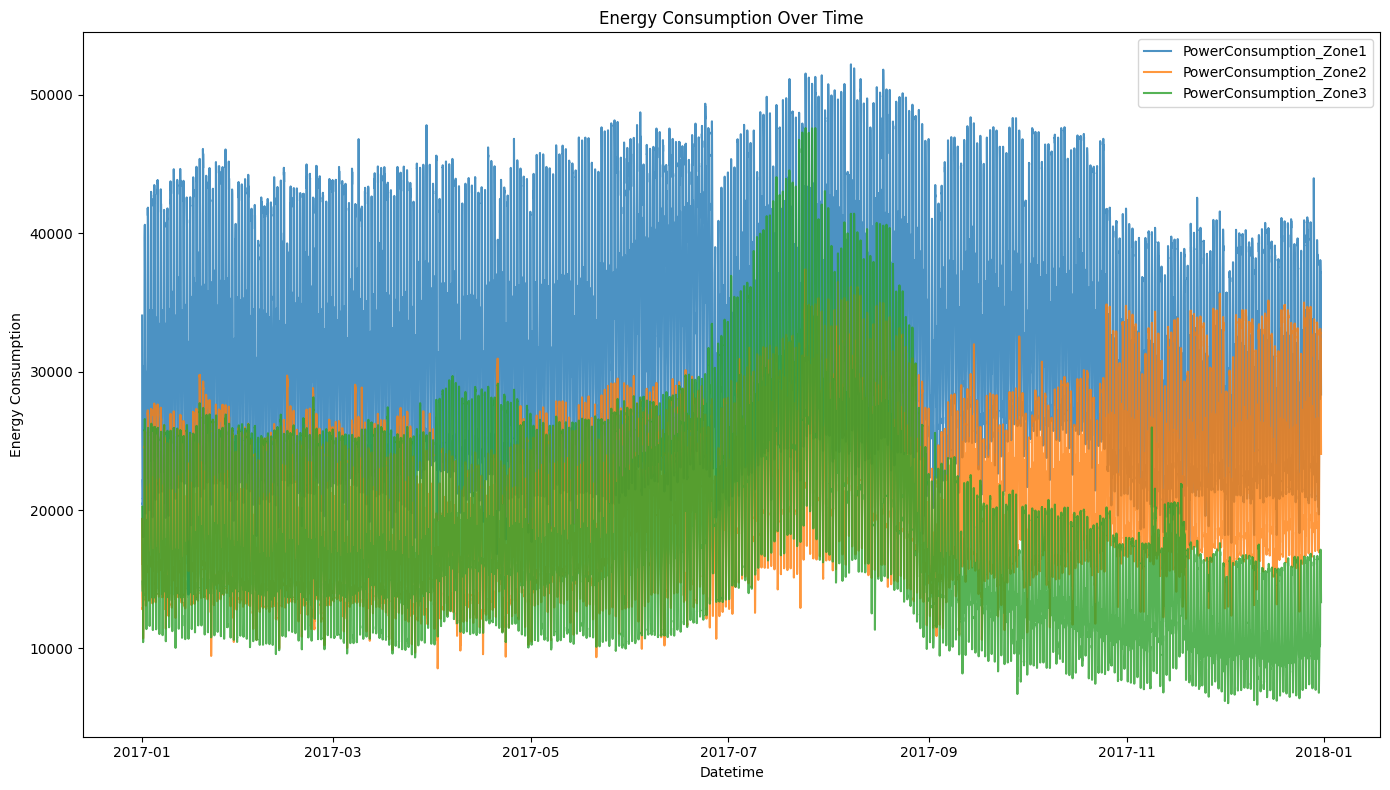

In [ ]:
# Plotting time series for energy consumption in each zone
plt.figure(figsize=(14, 8))
for zone in ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']:
    plt.plot(data['Datetime'], data[zone], label=zone,alpha=0.8)

plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.tight_layout()
plt.show()

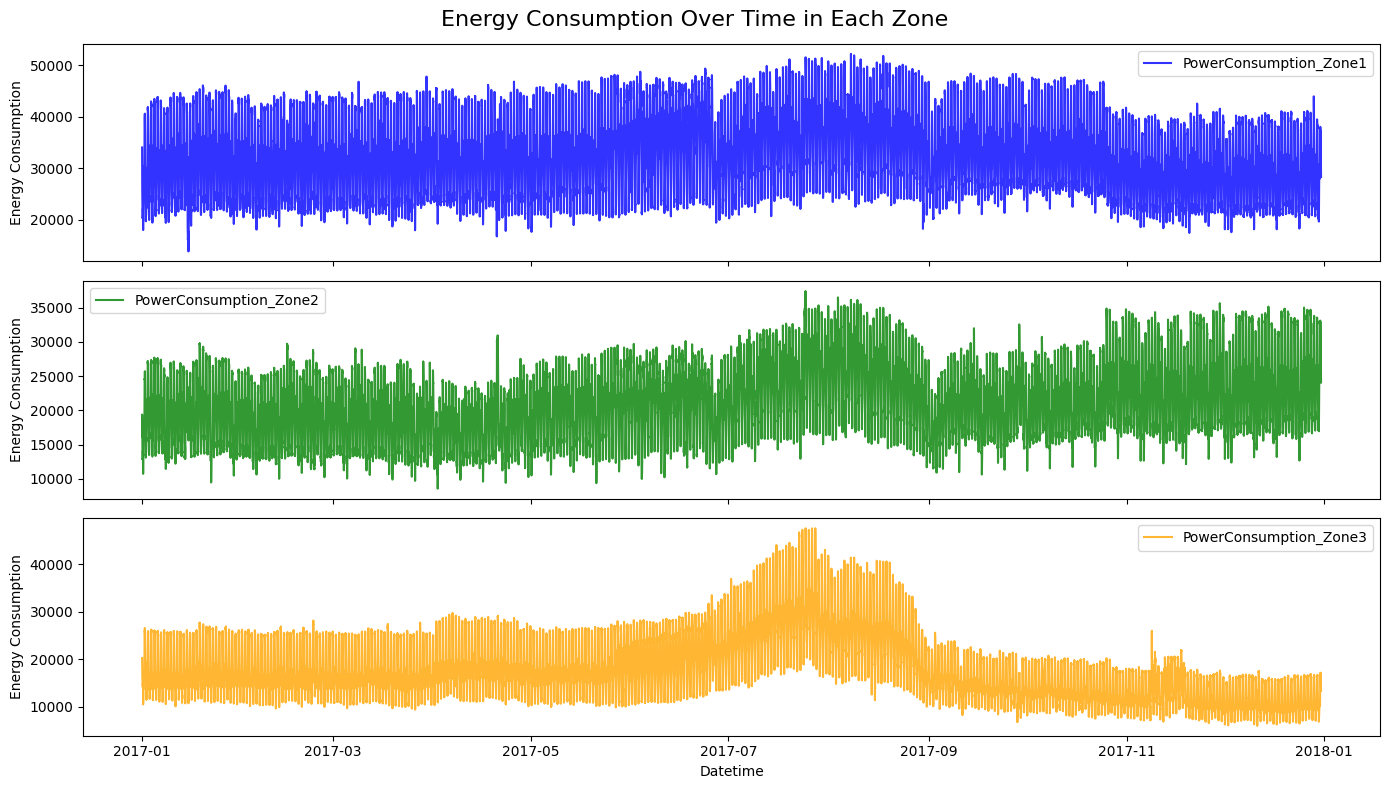

In [ ]:
# Plotting time series for energy consumption in each zone using subplots with different colors
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)

zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
colors = ['blue', 'green', 'orange']

for i, zone in enumerate(zones):
    axes[i].plot(data['Datetime'], data[zone], label=zone, alpha=0.8, color=colors[i])
    axes[i].set_ylabel('Energy Consumption')
    axes[i].legend()

fig.suptitle('Energy Consumption Over Time in Each Zone', fontsize=16)
axes[-1].set_xlabel('Datetime')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

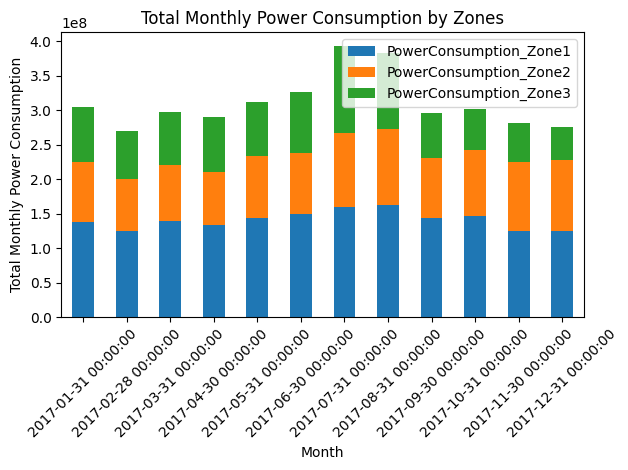

In [ ]:
# Bar chart for energy monthly frequency usage across different zones
monthly_total_consumption = data.resample('M', on='Datetime')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sum()

# Create a bar plot
plt.figure(figsize=(12, 8))
monthly_total_consumption.plot(kind='bar', stacked=True)  # Use stacked bar chart for multiple zones

plt.xlabel('Month')
plt.ylabel('Total Monthly Power Consumption')
plt.title('Total Monthly Power Consumption by Zones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


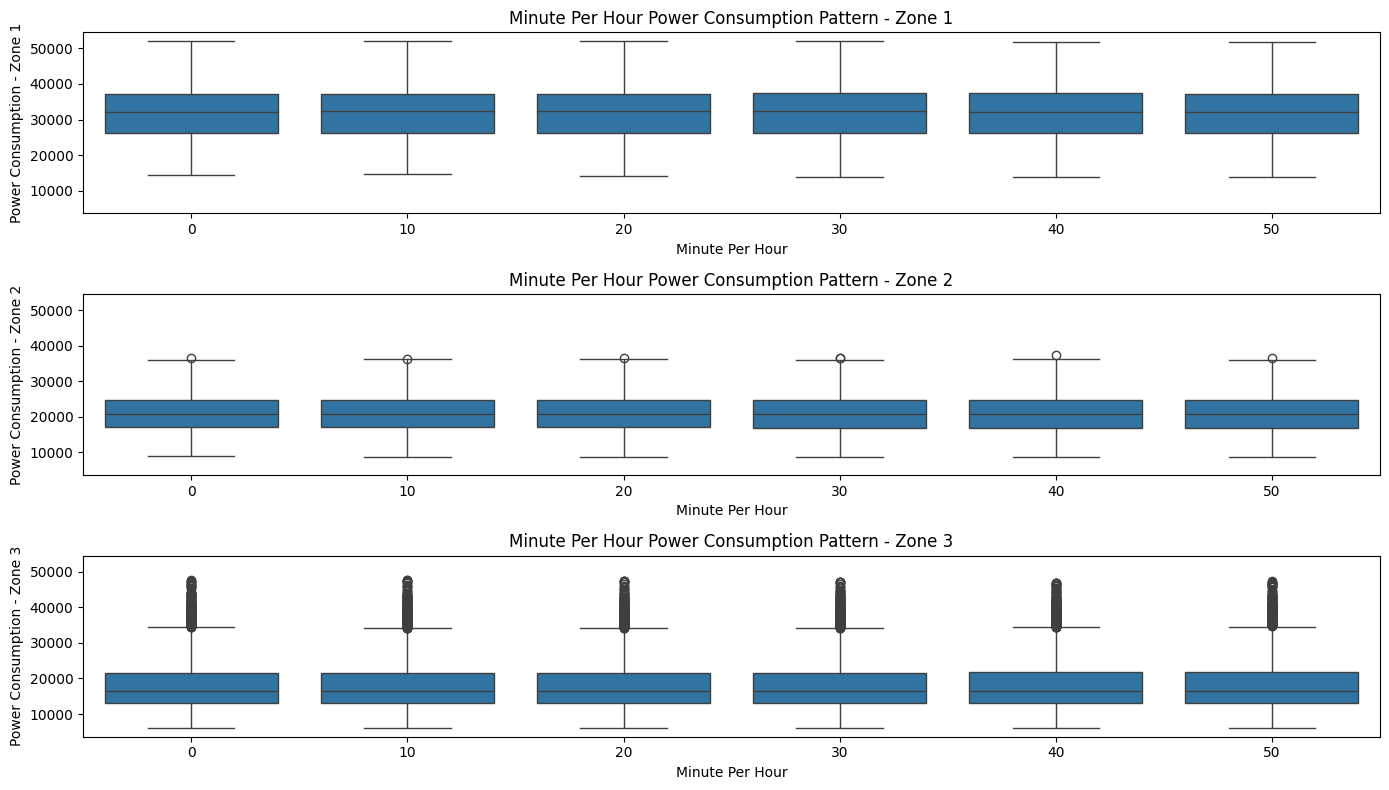

In [ ]:
# Creating minute per hour trend trend.
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharey=True)

# Plot for PowerConsumption_Zone1
sns.boxplot(x='Minute', y='PowerConsumption_Zone1', data=data, ax=axes[0])
axes[0].set_xlabel('Minute Per Hour')
axes[0].set_ylabel('Power Consumption - Zone 1')
axes[0].set_title('Minute Per Hour Power Consumption Pattern - Zone 1')

# Plot for PowerConsumption_Zone2
sns.boxplot(x='Minute', y='PowerConsumption_Zone2', data=data, ax=axes[1])
axes[1].set_xlabel('Minute Per Hour')
axes[1].set_ylabel('Power Consumption - Zone 2')
axes[1].set_title('Minute Per Hour Power Consumption Pattern - Zone 2')

# Plot for PowerConsumption_Zone3
sns.boxplot(x='Minute', y='PowerConsumption_Zone3', data=data, ax=axes[2])
axes[2].set_xlabel('Minute Per Hour')
axes[2].set_ylabel('Power Consumption - Zone 3')
axes[2].set_title('Minute Per Hour Power Consumption Pattern - Zone 3')

plt.tight_layout()
plt.show()

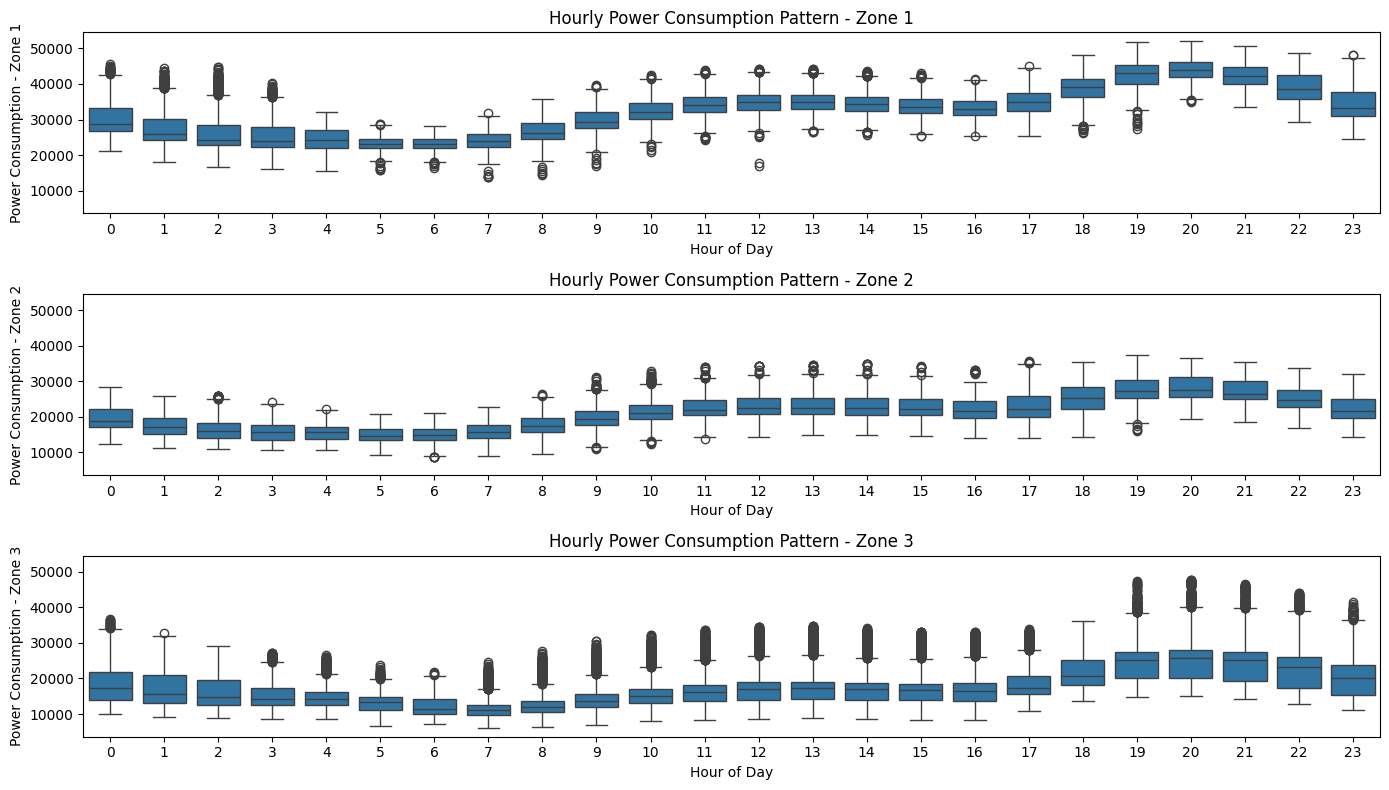

In [ ]:
# Creating hour of the day trend.
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharey=True)

# Plot for PowerConsumption_Zone1
sns.boxplot(x='Hour', y='PowerConsumption_Zone1', data=data, ax=axes[0])
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Power Consumption - Zone 1')
axes[0].set_title('Hourly Power Consumption Pattern - Zone 1')

# Plot for PowerConsumption_Zone2
sns.boxplot(x='Hour', y='PowerConsumption_Zone2', data=data, ax=axes[1])
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Power Consumption - Zone 2')
axes[1].set_title('Hourly Power Consumption Pattern - Zone 2')

# Plot for PowerConsumption_Zone3
sns.boxplot(x='Hour', y='PowerConsumption_Zone3', data=data, ax=axes[2])
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('Power Consumption - Zone 3')
axes[2].set_title('Hourly Power Consumption Pattern - Zone 3')

plt.tight_layout()
plt.show()

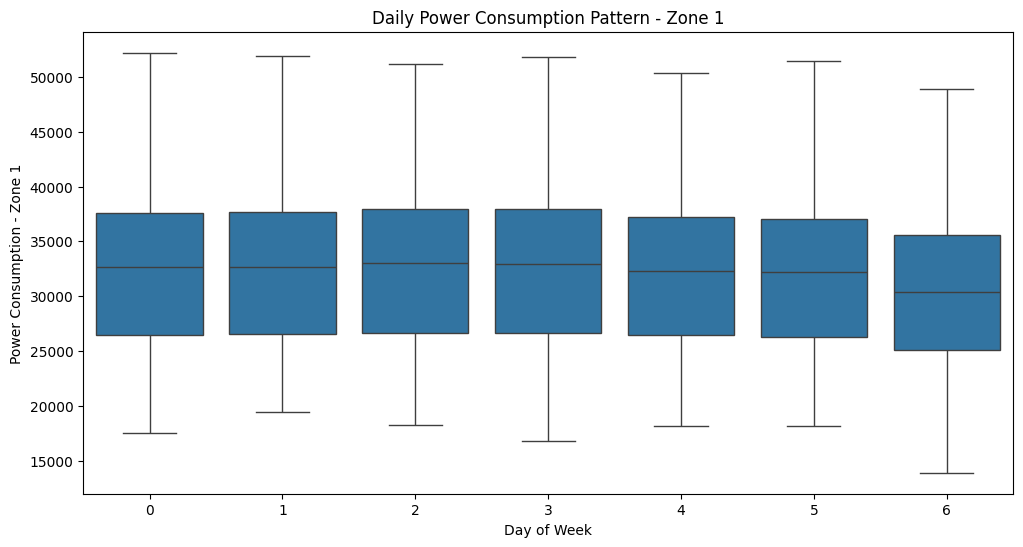

In [ ]:
# Creating day of the week trend.
data['DayOfWeek'] =  data['Datetime'].dt.dayofweek

# Boxplot for daily consumption pattern for Zone 1
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='PowerConsumption_Zone1', data= data)
plt.xlabel('Day of Week')
plt.ylabel('Power Consumption - Zone 1')
plt.title('Daily Power Consumption Pattern - Zone 1')
plt.show()

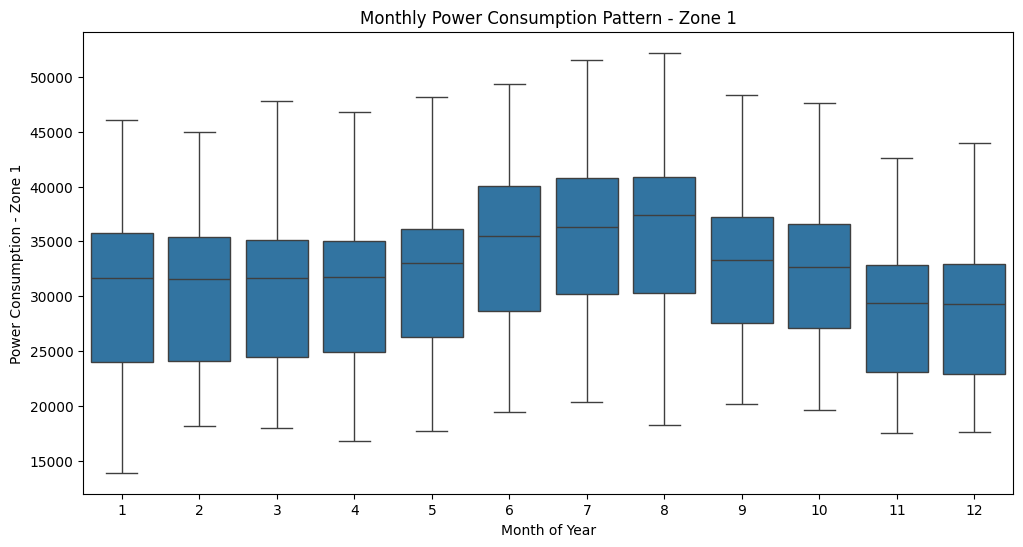

In [ ]:
# Creating month of the year trend.
data['Month'] =  data['Datetime'].dt.month

# Boxplot for monthly consumption pattern for Zone 1
plt.figure(figsize=(12, 6))

sns.boxplot(x='Month', y='PowerConsumption_Zone1', data= data)
plt.xlabel('Month of Year')
plt.ylabel('Power Consumption - Zone 1')
plt.title('Monthly Power Consumption Pattern - Zone 1')
plt.show()

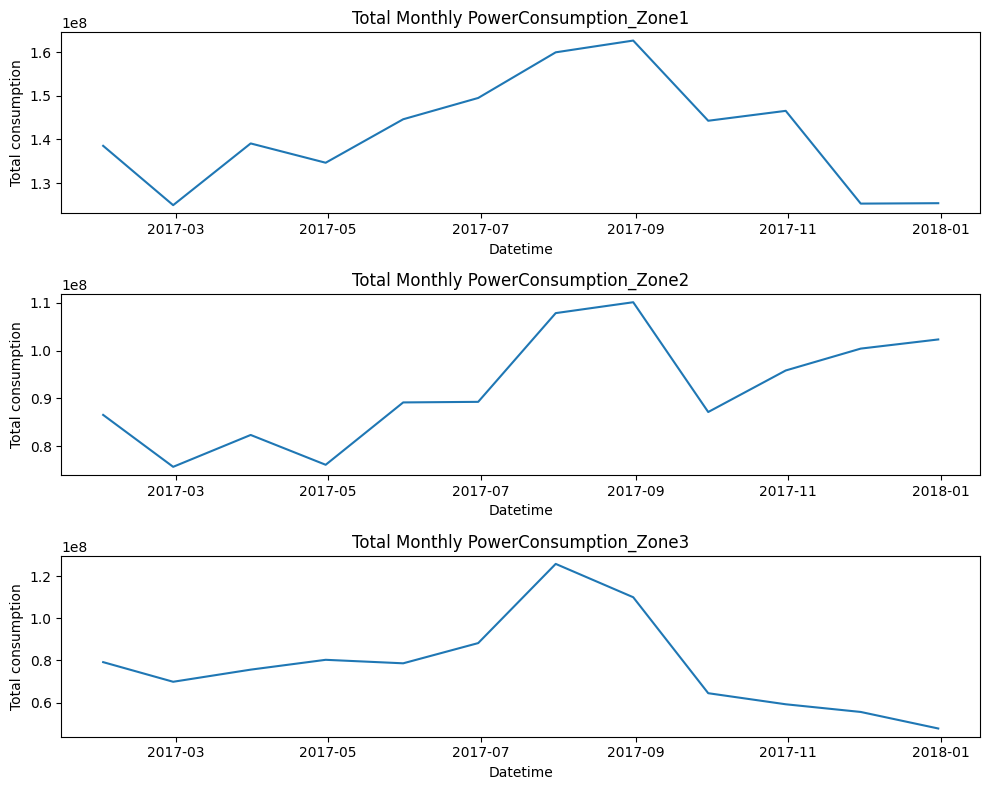

In [ ]:
time_based_date = data.groupby('Datetime').agg({
    'PowerConsumption_Zone1': 'sum',
    'PowerConsumption_Zone2': 'sum',
    'PowerConsumption_Zone3': 'sum',
}).reset_index()

time_based_date = time_based_date.set_index('Datetime').resample('M').sum().reset_index()
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Quantity Sold over time
sns.lineplot(data=time_based_date, x='Datetime', y='PowerConsumption_Zone1', ax=ax[0])
ax[0].set_title('Total Monthly PowerConsumption_Zone1')
ax[0].set_ylabel('Total consumption')

sns.lineplot(data=time_based_date, x='Datetime', y='PowerConsumption_Zone2', ax=ax[1])
ax[1].set_title('Total Monthly PowerConsumption_Zone2')
ax[1].set_ylabel('Total consumption')

sns.lineplot(data=time_based_date, x='Datetime', y='PowerConsumption_Zone3', ax=ax[2])
ax[2].set_title('Total Monthly PowerConsumption_Zone3')
ax[2].set_ylabel('Total consumption')

plt.tight_layout()
plt.show()

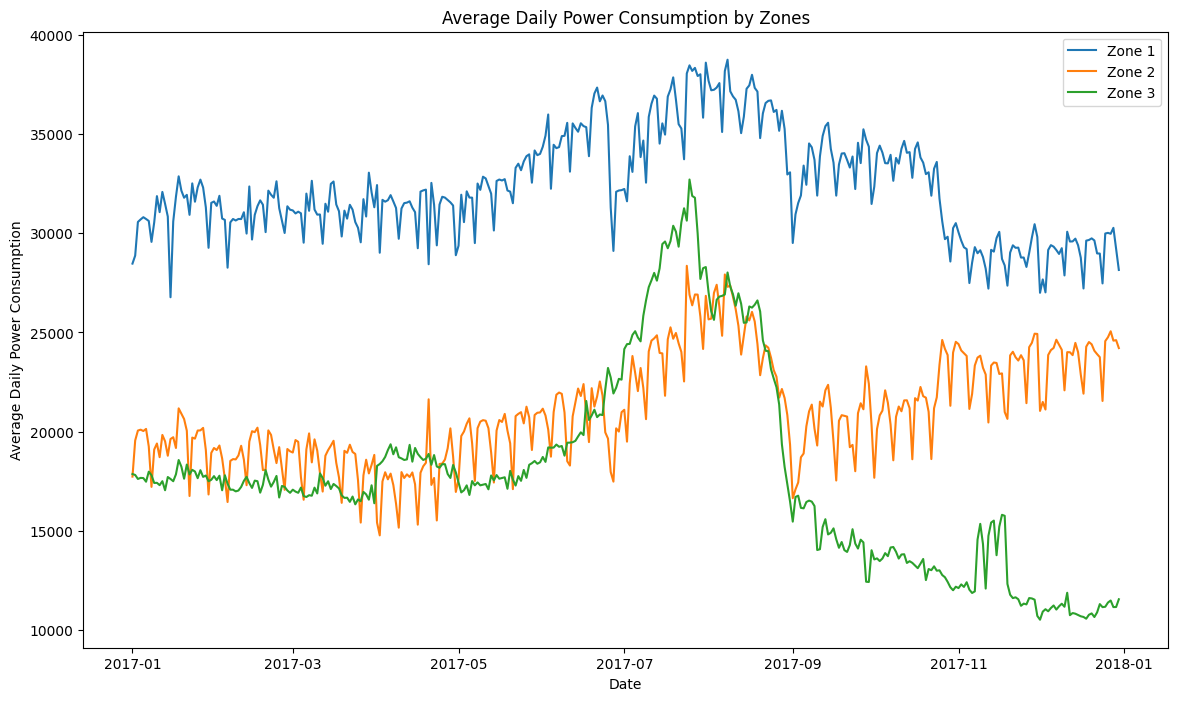

In [ ]:
# average daily frequency, taking the mean for each day
daily_avg_consumption = data.resample('D', on='Datetime')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()

# Plotting Average Daily Power Consumption
plt.figure(figsize=(14, 8))
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone3'], label='Zone 3')

plt.xlabel('Date')
plt.ylabel('Average Daily Power Consumption')
plt.title('Average Daily Power Consumption by Zones')
plt.legend()
plt.show()

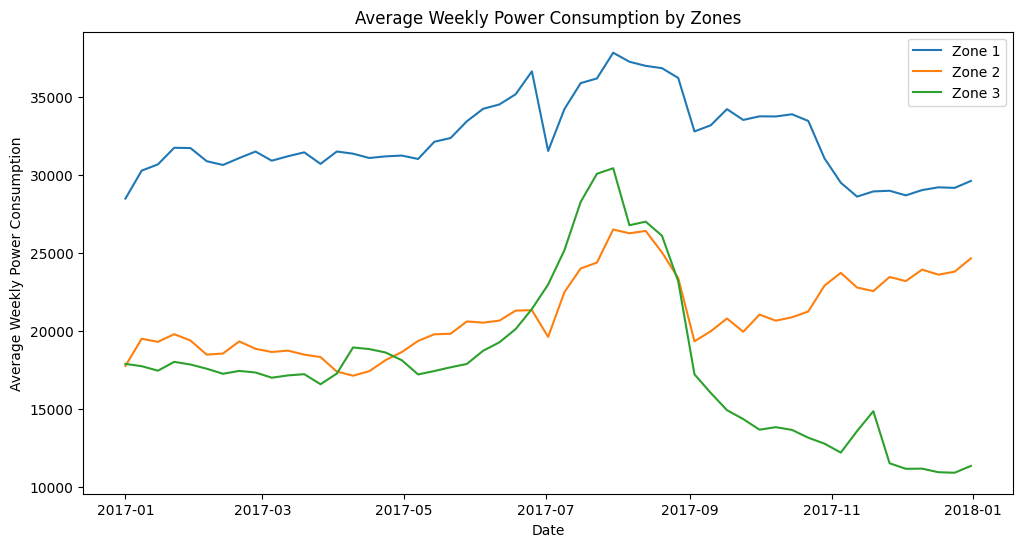

In [ ]:
# Weekly frequency, taking the mean for each week
daily_avg_consumption = data.resample('W', on='Datetime')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()

# Plotting Average Daily Power Consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone3'], label='Zone 3')

plt.xlabel('Date')
plt.ylabel('Average Weekly Power Consumption')
plt.title('Average Weekly Power Consumption by Zones')
plt.legend()
plt.show()

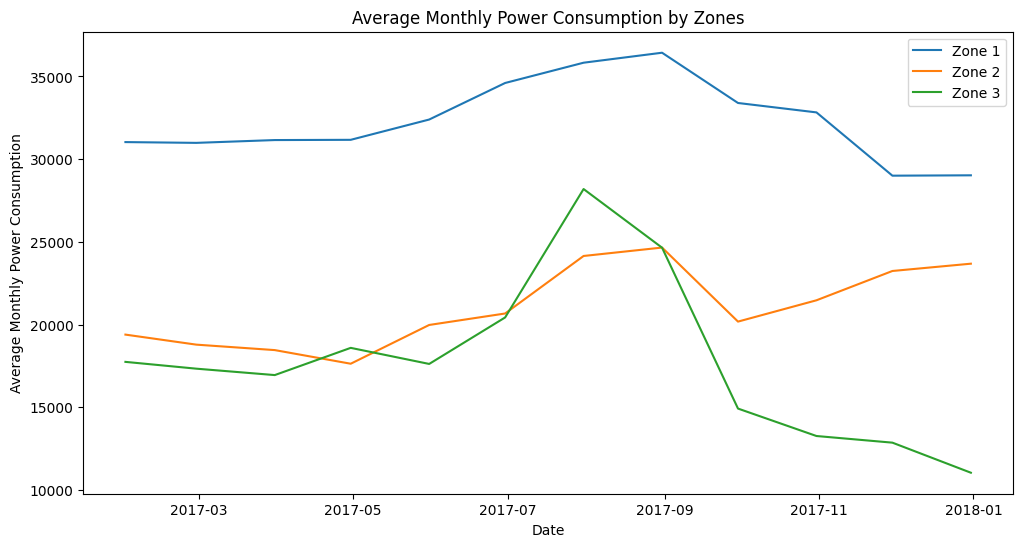

In [ ]:
#Monthly frequency, taking the mean for each month
daily_avg_consumption = data.resample('M', on='Datetime')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()

# Plotting Average Daily Power Consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(daily_avg_consumption.index, daily_avg_consumption['PowerConsumption_Zone3'], label='Zone 3')

plt.xlabel('Date')
plt.ylabel('Average Monthly Power Consumption')
plt.title('Average Monthly Power Consumption by Zones')
plt.legend()
plt.show()


## Graph to identify trends between energy consumption and temperature

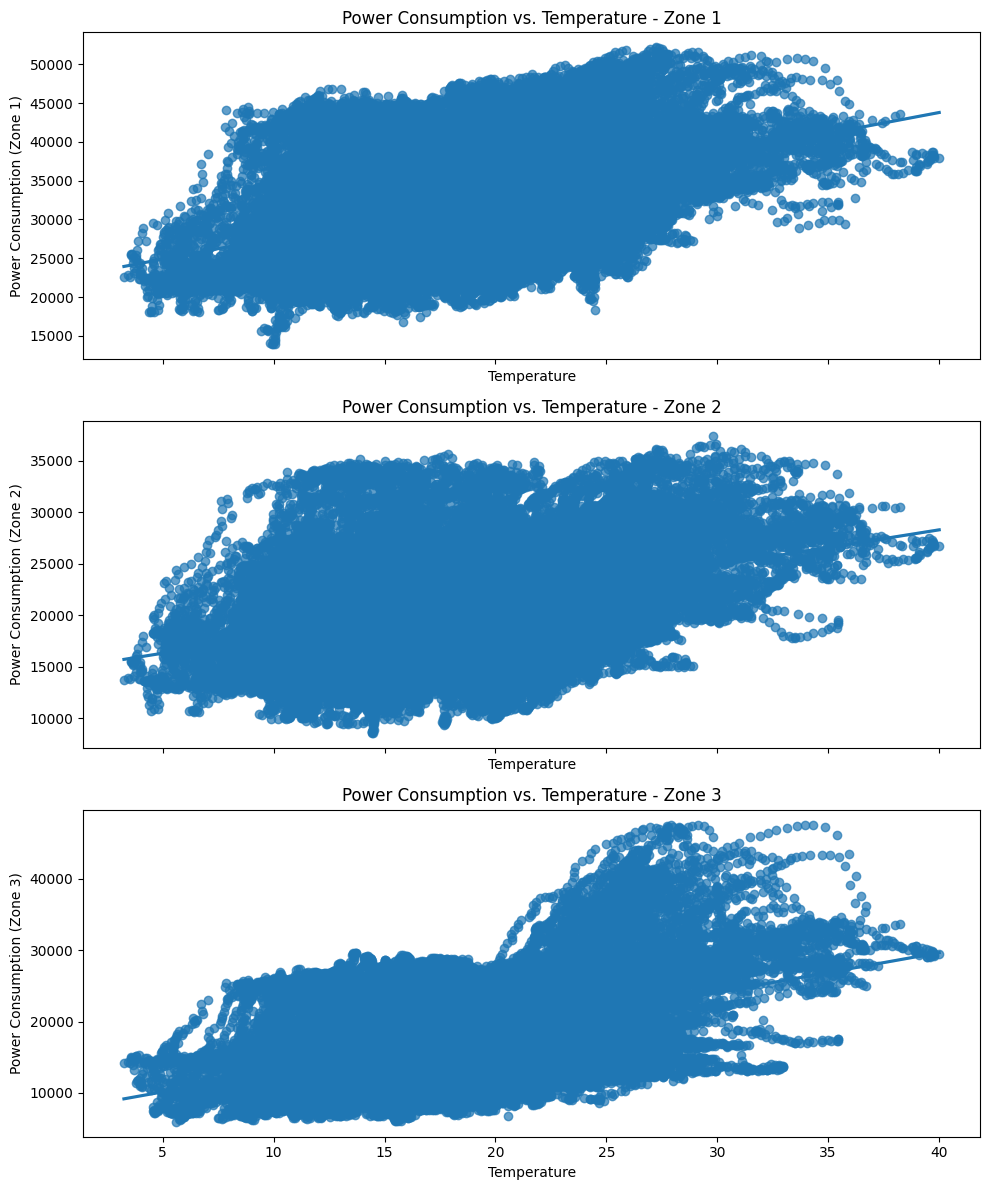

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
zone_names = ['Zone 1', 'Zone 2', 'Zone 3']

for i, zone in enumerate(zones):
    sns.regplot(x='Temperature', y=zone, data=data, scatter_kws={'alpha': 0.7}, ax=axes[i])
    axes[i].set_title(f'Power Consumption vs. Temperature - {zone_names[i]}')
    axes[i].set_ylabel(f'Power Consumption ({zone_names[i]})')

plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

## Graph to identify trends between energy consumption and humidity

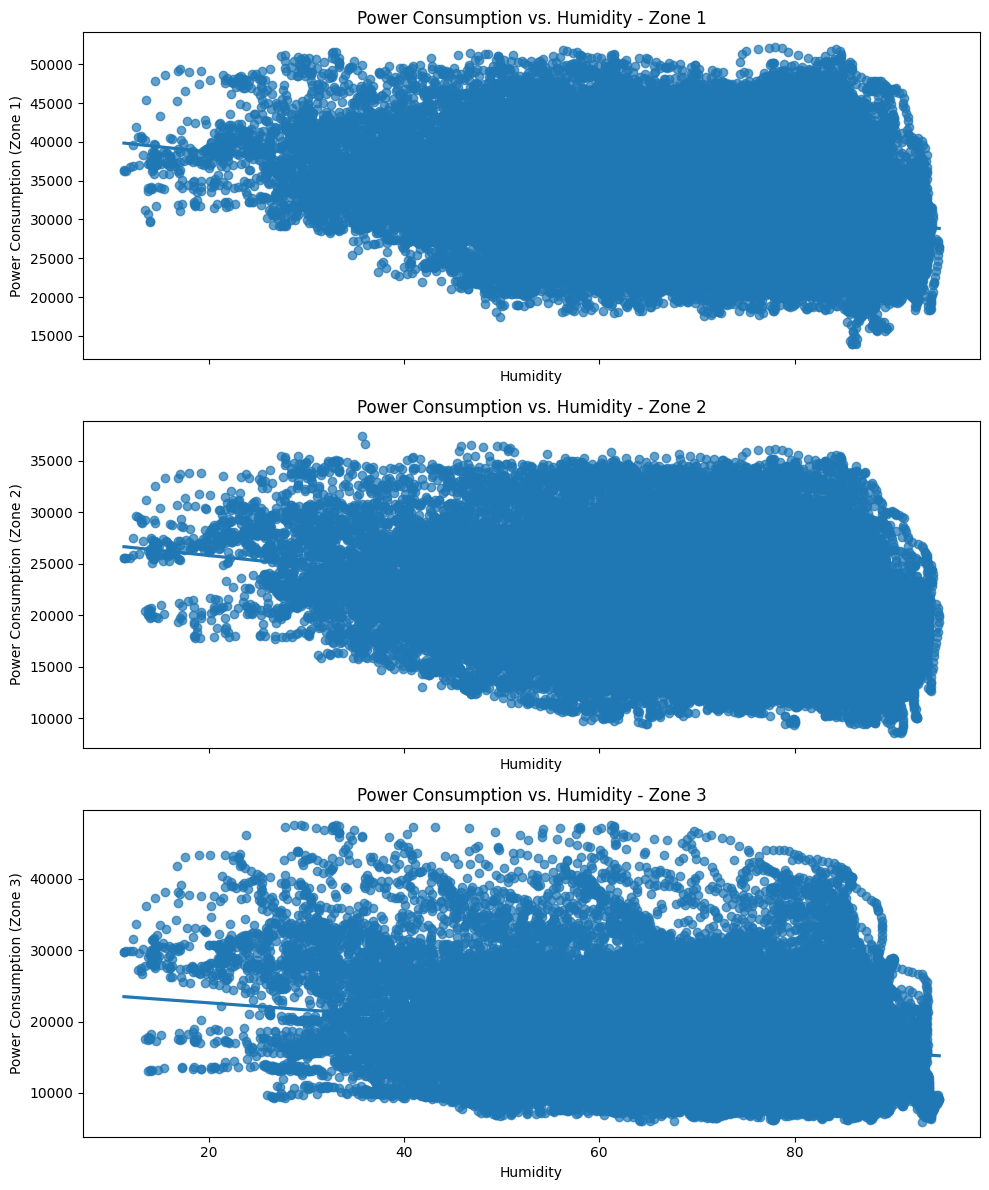

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
zone_names = ['Zone 1', 'Zone 2', 'Zone 3']

for i, zone in enumerate(zones):
    sns.regplot(x='Humidity', y=zone, data=data, scatter_kws={'alpha': 0.7}, ax=axes[i])
    axes[i].set_title(f'Power Consumption vs. Humidity - {zone_names[i]}')
    axes[i].set_ylabel(f'Power Consumption ({zone_names[i]})')

plt.xlabel('Humidity')
plt.tight_layout()
plt.show()

## Graph to identify trends between energy consumption and windspeed

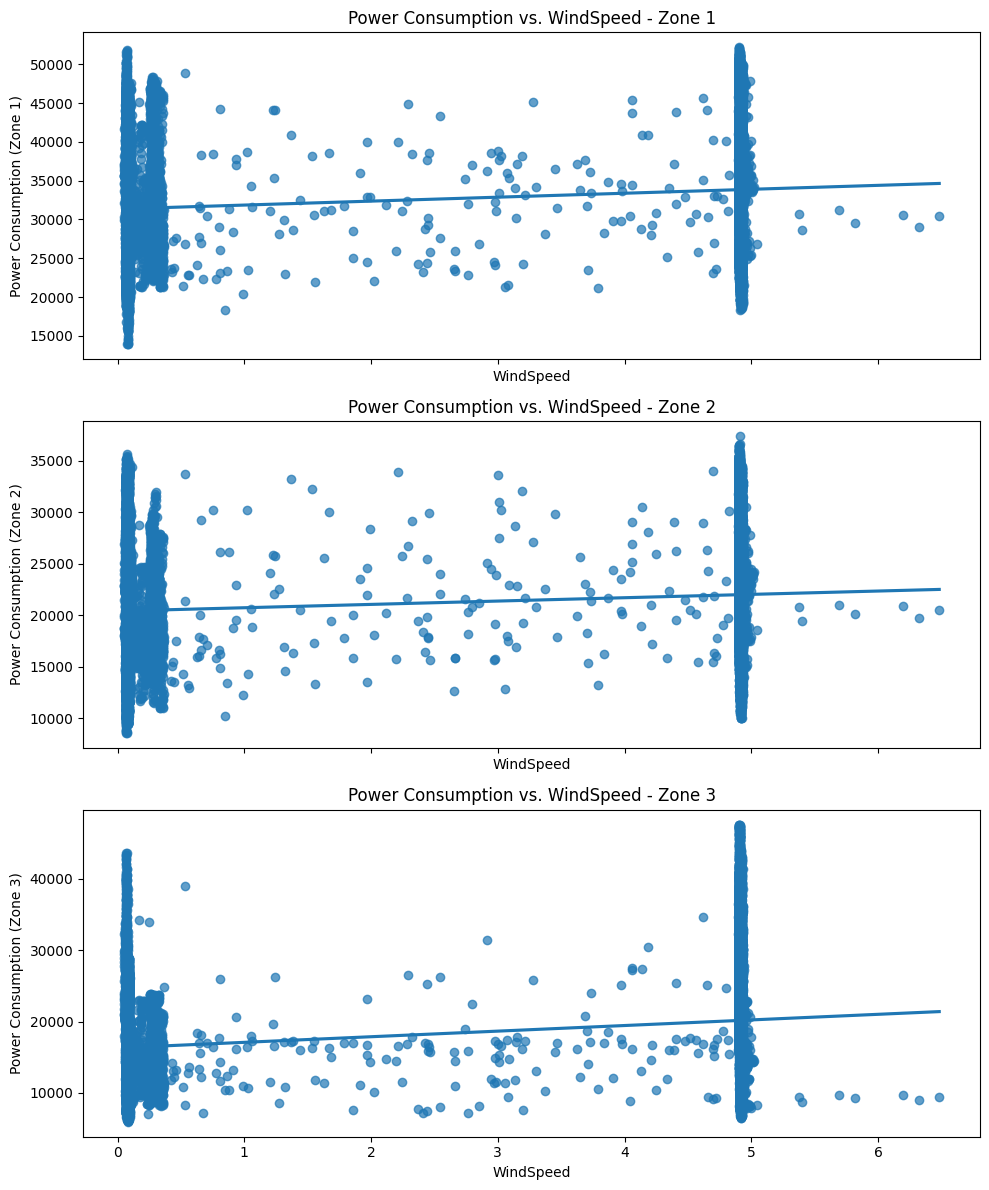

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
zone_names = ['Zone 1', 'Zone 2', 'Zone 3']

for i, zone in enumerate(zones):
    sns.regplot(x='WindSpeed', y=zone, data=data, scatter_kws={'alpha': 0.7}, ax=axes[i])
    axes[i].set_title(f'Power Consumption vs. WindSpeed - {zone_names[i]}')
    axes[i].set_ylabel(f'Power Consumption ({zone_names[i]})')

plt.xlabel('WindSpeed')
plt.tight_layout()
plt.show()

## The trend of DiffuseFlows and GeneralDiffuseFlows to others variable

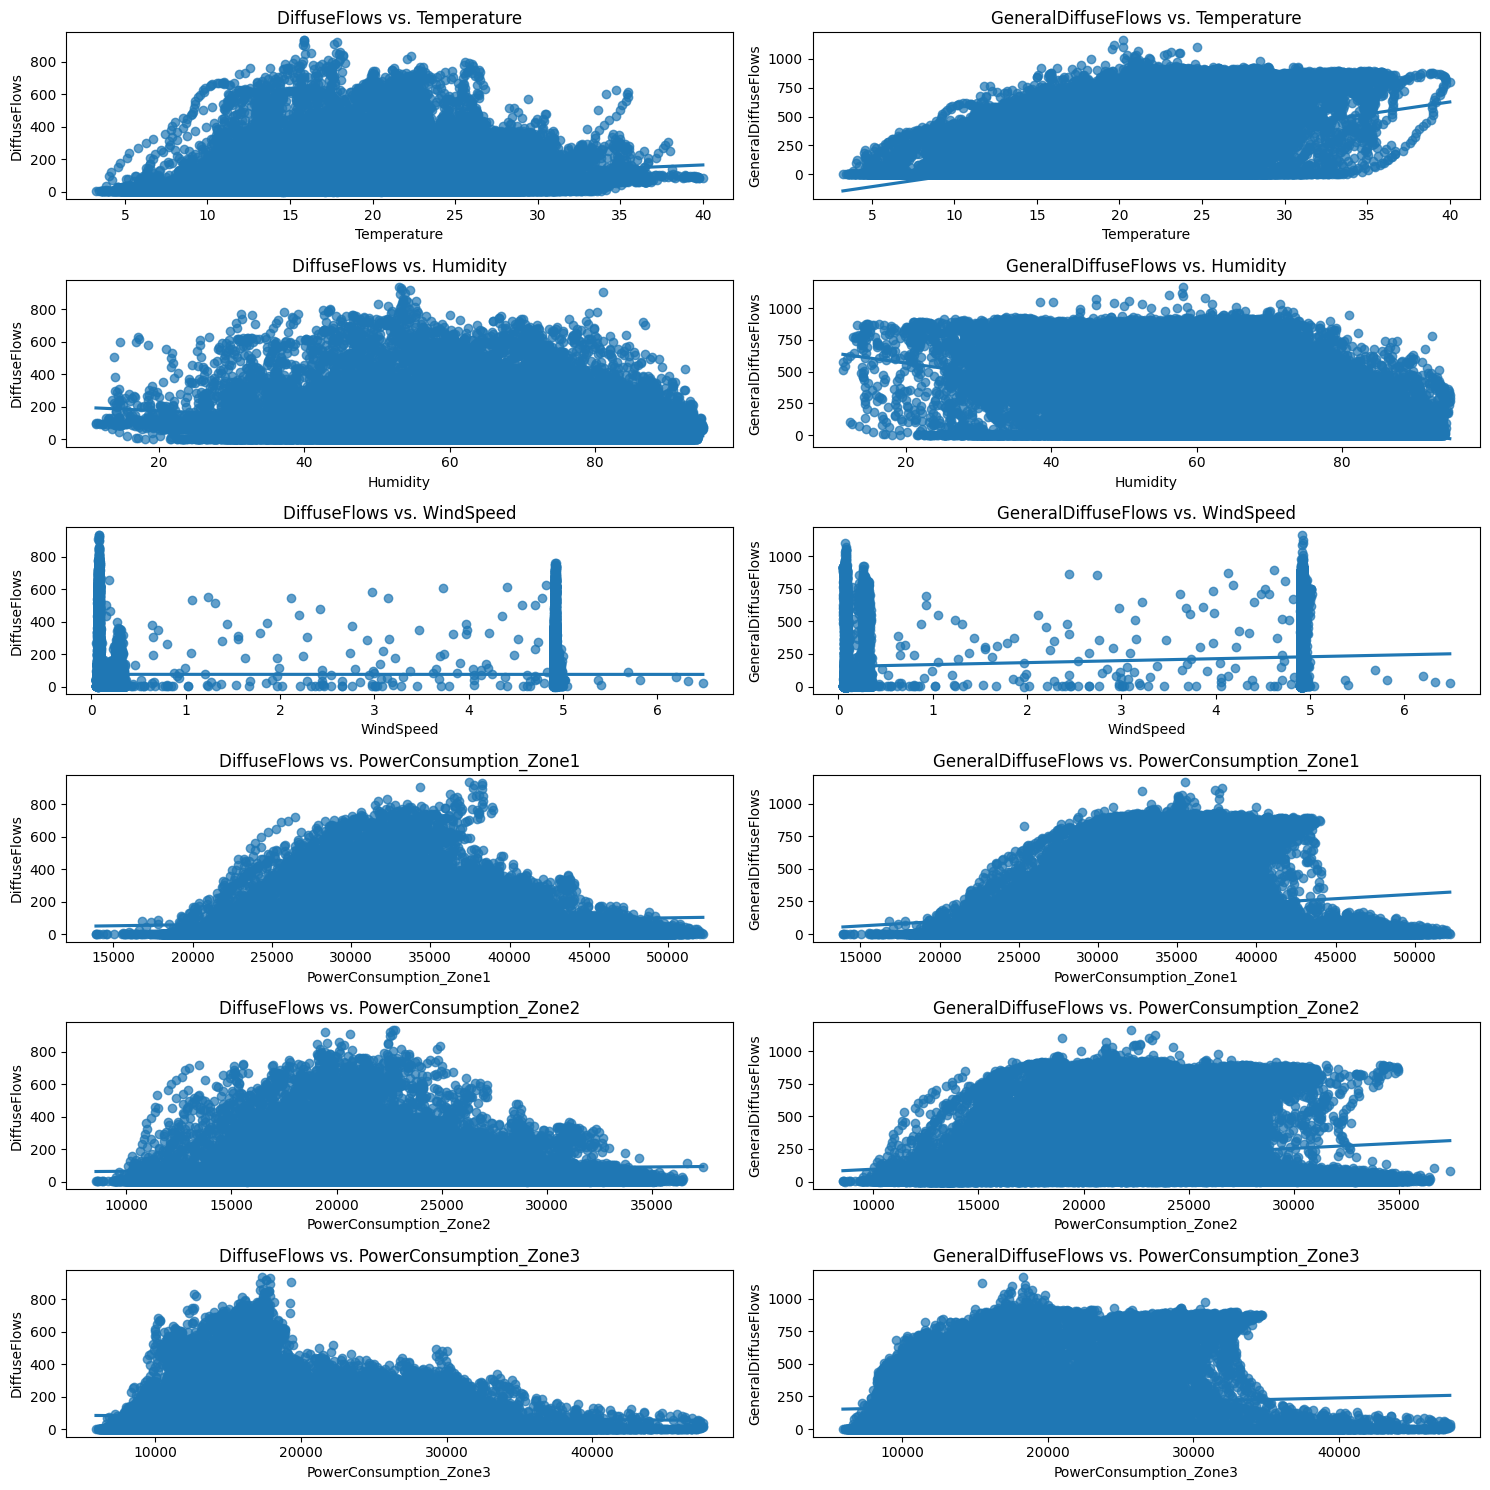

In [ ]:
# Variables to plot against
other_vars = ['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Create subplots
fig, axes = plt.subplots(len(other_vars), 2, figsize=(15, 15))

# Plot DiffuseFlows trends
for i, var in enumerate(other_vars):
    sns.regplot(x=var, y='DiffuseFlows', data=data, scatter_kws={'alpha': 0.7}, ax=axes[i, 0])
    axes[i, 0].set_title(f'DiffuseFlows vs. {var}')

# Plot GeneralDiffuseFlows trends
for i, var in enumerate(other_vars):
    sns.regplot(x=var, y='GeneralDiffuseFlows', data=data, scatter_kws={'alpha': 0.7}, ax=axes[i, 1])
    axes[i, 1].set_title(f'GeneralDiffuseFlows vs. {var}')

plt.tight_layout()
plt.show()

# Data Modelling

In [ ]:
import sklearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Minute', 'Hour',
       'Day', 'DayOfWeek', 'Month', 'Year', 'PowerConsumption_Zone'],
      dtype='object')

In [ ]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows',
            'Minute', 'Hour','Day', 'DayOfWeek', 'Month',]
X = data[features]
y =data [['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

In [ ]:
# Split data into 80% Training & 20% Testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Standardize data to avoid high variations in the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# define model base estimator
base_estimator = LinearRegression()

# Create a MultiOutputRegressor with the specified base estimator
model = MultiOutputRegressor(base_estimator)
# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model for each target variable
for i, target in enumerate(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']):
    mae = mean_absolute_error(y_test[target], predictions[:, i])
    rmse = mean_squared_error(y_test[target], predictions[:, i], squared=False)  # Use squared=False for RMSE
    r2 = r2_score(y_test[target], predictions[:, i])

    print(f'Metrics for {target}:')
    print(f'  MAE: {mae}')
    print(f'  RMSE: {rmse}')
    print(f'  R-squared: {r2}')


Metrics for PowerConsumption_Zone1:
  MAE: 3345.074374391531
  RMSE: 4213.361765676166
  R-squared: 0.6484279019486079
Metrics for PowerConsumption_Zone2:
  MAE: 2621.4374824081283
  RMSE: 3307.8376961234426
  R-squared: 0.5945928304301266
Metrics for PowerConsumption_Zone3:
  MAE: 3281.8087534166466
  RMSE: 4148.487564368531
  R-squared: 0.60531734614518


In [ ]:
# define model base estimator
base_estimator = DecisionTreeRegressor()

# Create a MultiOutputRegressor with the specified base estimator
dtr_model = MultiOutputRegressor(base_estimator)

# Train the model
dtr_model.fit(X_train, y_train)

# Make predictions
predictions = dtr_model.predict(X_test)

# Evaluate the model for each target variable
for i, target in enumerate(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']):
    mae = mean_absolute_error(y_test[target], predictions[:, i])
    rmse = mean_squared_error(y_test[target], predictions[:, i], squared=False)
    r2 = r2_score(y_test[target], predictions[:, i])

    print(f'Metrics for {target}:')
    print(f'  MAE: {mae}')
    print(f'  RMSE: {rmse}')
    print(f'  R-squared: {r2}')


Metrics for PowerConsumption_Zone1:
  MAE: 650.2972777241511
  RMSE: 1104.2668012476236
  R-squared: 0.9758506785577942
Metrics for PowerConsumption_Zone2:
  MAE: 457.38846883145743
  RMSE: 777.403984734999
  R-squared: 0.977607810265207
Metrics for PowerConsumption_Zone3:
  MAE: 382.5215583509157
  RMSE: 643.3632747767002
  R-squared: 0.990507491661259


In [ ]:
# define model base estimator
base_estimator = RandomForestRegressor()

# Create a MultiOutputRegressor with the specified base estimator
rfr = MultiOutputRegressor(base_estimator)

# Train the model
rfr.fit(X_train, y_train)

# Make predictions
predictions = rfr.predict(X_test)

# Evaluate the model for each target variable
for i, target in enumerate(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']):
    mae = mean_absolute_error(y_test[target], predictions[:, i])
    rmse = mean_squared_error(y_test[target], predictions[:, i], squared=False)
    r2 = r2_score(y_test[target], predictions[:, i])

    print(f'Metrics for {target}:')
    print(f'  MAE: {mae}')
    print(f'  RMSE: {rmse}')
    print(f'  R-squared: {r2}')


Metrics for PowerConsumption_Zone1:
  MAE: 486.3086196877525
  RMSE: 751.2553168339108
  R-squared: 0.9888228258377696
Metrics for PowerConsumption_Zone2:
  MAE: 343.69483350476327
  RMSE: 525.4152408590852
  R-squared: 0.9897715842264052
Metrics for PowerConsumption_Zone3:
  MAE: 288.6613220658412
  RMSE: 444.08875110629447
  R-squared: 0.9954771935836388


##Cross-validation to ensure the robustness of the models.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Create and train a model
model = LinearRegression()
# 5 folds, shuffled
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#trained model  LinearRegression
scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

RMSE scores: [3911.6985511  3951.94234329 3964.10520815 3943.93490201 3911.61944748]
Average RMSE: 3936.6600904063694
Standard deviation of RMSE: 21.40007881962419


In [ ]:
# Create and train a model
dtr_model = DecisionTreeRegressor(random_state=42)
# 5 folds, shuffled
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#trained model  DecisionTreeRegressor
scores = cross_val_score(dtr_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

RMSE scores: [818.30771741 802.66874393 799.4039765  830.00689634 802.85880573]
Average RMSE: 810.6492279805836
Standard deviation of RMSE: 11.697916652110363


In [ ]:
# Create and train a  model
rfr_model = RandomForestRegressor(random_state=42)
# 5 folds, shuffled
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#trained model RandomForestRegressor
scores = cross_val_score(rfr, X, y, cv=kfold, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

RMSE scores: [589.68859667 609.36433448 609.82454211 623.12831702 611.74914066]
Average RMSE: 608.7509861889527
Standard deviation of RMSE: 10.775898893036688


#Insights from Predictive Models

**Model Performance:**
The RandomForestRegressor model demonstrated the best performance with the lowest MAE and RMSE scores and high R-squared values across all three zones, meaning the model's predictions align well with actual consumption patterns.

**Key Factors:**
Based on the correlation matrix and feature importance from the RandomForestRegressor, the following are key influencers of energy consumption.

Temperature: Exhibits a strong positive correlation with energy usage, suggesting increased consumption during warmer periods.

Hour of the day: Consumption patterns vary significantly throughout the day, indicating peak and off-peak hours.

DiffuseFlows and GeneralDiffuseFlows: These variables are related to solar radiation. However, their impact on energy usage can be variable depending on weather conditions.

Day of the week and month: Consumption differs across days of the week and months, indicating behavioral patterns and seasonal effects.

Trends and Patterns: The EDA charts reveal daily, weekly, and monthly trends for each zone.




##Potential Areas for Efficiency Improvements

Demand-Side Management:
Strategies to optimize energy usage based on the identified key factors.
This could include:

Peak shaving and load shifting: Reduce peak demand by shifting consumption to off-peak hours. The analysis identified temperature and the hour of the day as key factors influencing energy consumption in Tetouan. This means peak demand likely occurs during the hottest parts of the day and in the evenings.

Demand response programs: Offer incentives for reduced energy use during peak periods.

Improved building insulation: This will reduce dependence on cooling systems.

Solar energy integration: During peak hours of power consumption, solar power can be used as an alternative.

Zone-Specific Optimization: Tailoring efficiency measures to the unique characteristics of each consumption zone.

Public Awareness Campaigns: Educating residents and businesses about energy-saving practices, peak consumption periods, and the benefits of demand management.

Solar energy: This will reduce the cost of electricity bills, since solar energy is renewable energy.

Wind energy: This energy is also efficient, especially in areas where wind speed is high.

Recommendation

The city of Tetouan should consider implementing these efficiency measures to manage its growing energy demand and reduce reliance on imported hydrocarbons.

## Energy Consumption Analysis and Optimization Strategies for Tetouan, Morocco
Executive Summary

This report presents the findings of a data-driven analysis of energy consumption patterns in Tetouan, Morocco, with the objective of identifying opportunities for energy conservation and optimization. The analysis leveraged historical energy consumption data, environmental factors, and machine learning techniques. Key findings indicate that temperature, hour of the day, and day of the week are primary influencers of energy usage. Based on these insights, actionable recommendations are provided for demand-side management, temperature-dependent strategies, zone-specific optimization, public awareness, and the adoption of renewable energy sources. Implementing these strategies can lead to significant reductions in energy consumption, cost savings, and a lower environmental footprint.

1. Introduction

Tetouan, a rapidly growing city in Morocco, faces energy management challenges due to increasing demand and reliance on imported hydrocarbons. Understanding the factors that influence energy consumption is crucial for efficient energy distribution and utilization. This project aims to analyze energy consumption data to identify trends, correlations, and potential areas for efficiency improvements.

2. Data Analysis and Methodology

The project employed a comprehensive data analytics approach encompassing data collection, preprocessing, exploratory data analysis (EDA), predictive modeling, and insight generation. Historical energy consumption data for three zones within Tetouan, along with environmental factors such as temperature, humidity, wind speed, and solar radiation, were collected. The data underwent cleaning, transformation, and feature engineering to prepare it for analysis.

EDA techniques, including visualizations and statistical analysis, were used to identify trends and correlations between energy consumption and environmental factors. A RandomForestRegressor model, known for its robust performance, was selected for predictive modeling. The dataset was split into training and testing sets, and the model was evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared. Cross-validation was performed to ensure the model's robustness.

3. Key Findings and Insights

Energy Consumption Patterns:

Energy consumption exhibits distinct daily, weekly, and monthly patterns.
Daily peaks are observed during the evening hours, while weekdays generally have higher consumption compared to weekends.
Consumption trends vary across the three zones, reflecting differences in energy usage behaviors.
[]

Impact of Environmental Factors:

Temperature has a strong positive correlation with energy consumption, indicating increased demand during warmer periods.
DiffuseFlows and GeneralDiffuseFlows, related to solar radiation, influence energy usage but with varying degrees of impact.
Humidity and wind speed have a moderate impact on consumption.
[]

Zone-Specific Observations:

Zone 1 consistently demonstrates the highest energy consumption followed by Zone 2 and Zone 3.
Zone-specific peak hours and daily/weekly trends are observed.
[]



In [ ]:
!pip install pypickle

In [ ]:
import pickle

In [ ]:
filepath = 'e_consumption.pkl'
pickle.dump(rfr, open(filepath, "wb"))

In [ ]:
# Load the saved model
loaded_model = pickle.load(open(filepath, "rb"))


In [ ]:
input_data = (6.559,	73.8,	0.083,	0.051,	0.119,	0	,0,	1,	6	,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array so the model will understand I am making prediction for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if np.all(prediction[0] == 0):
    print("Non Predicted Power Consumption")
else:
    print("Predicted Power Consumption")

Predicted Power Consumption


In [ ]:
import pypickle
filepath = 'e_consumption.pkl' # save the work as (.pkl) in variable filepath
pypickle.save(filepath,model) # save the model and filepath

[pypickle] File already exists and is not overwritten: [e_consumption.pkl]


False